#**Time series forecasting**


Time series analysis is a popular field of data science and machine learning that decomposes historical data to identify trends, seasonality, and noise to forecast future trends.

The choice of algorithm depends on the data set and the business problem at hand. Time series analysis is critical for making informed decisions based on historical data.


Real-world data like that of demand data in any industry generally has a lot of seasonality and trends. When forecasting demands in such cases requires models which will account for the trend and seasonality in the data as the decision made by the business is going to be based on the result of this model.

#**Time series forecasting using Holt-Winter's model**

Holt-Winters is a model of time series behavior. Forecasting always requires a model, and Holt-Winters is a way to model three aspects of the time series.

Holt-Winter's model works well with trends and seasonal forecasting. It should not be used to random dataset (without trend?

Holt-winter models have three components;
* Level i.e typical value
* Trend i.e the slope over time
* Seasonality i.e. a cyclical repeating pattern

###**Understanding the key components of Holt-Winters - level, trend, and seasonality - through visual models.**

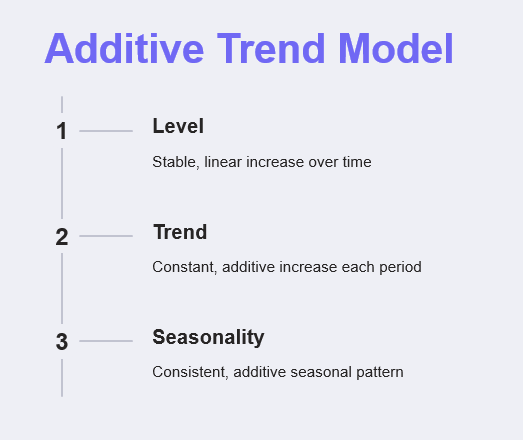


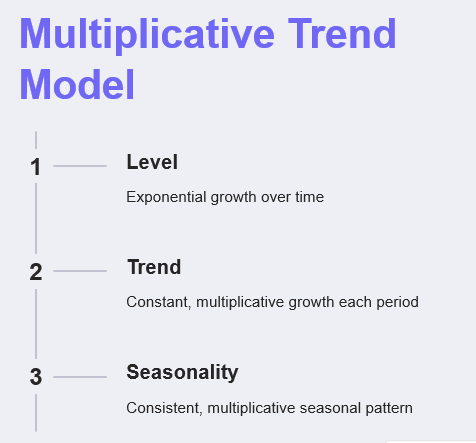

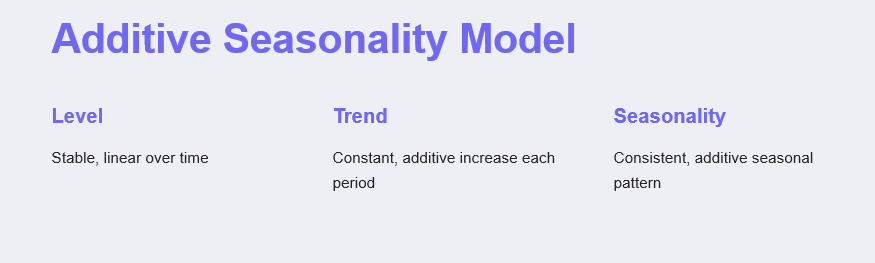


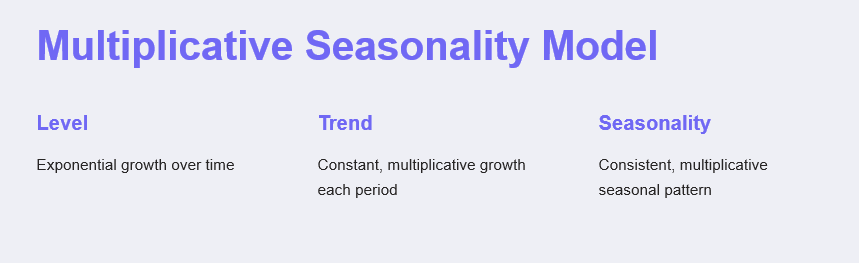

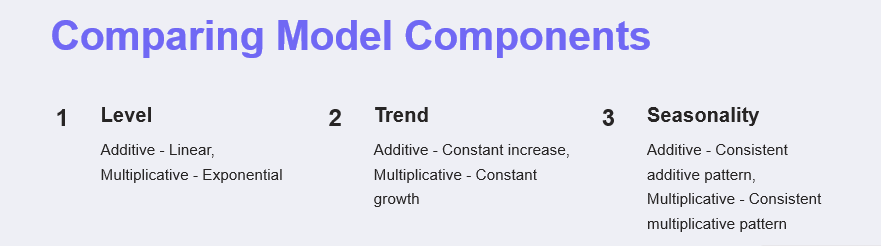

--------------------------------------------------------



There are different types of Holt-Winters models depending on the nature of the different components:


**The types can be subdivided into:**

* Additive trend: the trend is constant. It can be increasing or decreasing shpwing changes ver time.
* Multiplicative trend: The trend has  variations. iT can also be decreasing or increasing.





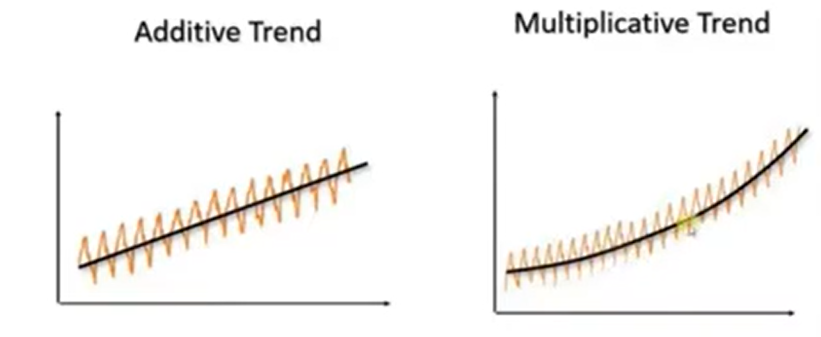

* Additive seasonality. The season is constant changes.
* Multiplicative seasonality. The season has variation changes

##Holt-Winters Exponential Smoothing Formula

* This method has 3 major aspects for performing the predictions.
      It has a level or an average value with the trend and seasonality.
* The three aspects are 3 types of exponential smoothing and hence the hold winter’s method is also known as triple exponential smoothing.


**Exponential Smoothing:** Simple exponential smoothing as the name suggest is used for forecasting when the data set has no trends or seasonality.

**Holt’s Smoothing method:** Holt’s smoothing technique, also known as linear exponential smoothing, is a widely known smoothing model for forecasting data that has a trend.

**Winter’s Smoothing method:** Winter’s smoothing technique allows us to include seasonality while making the prediction along with the trend.

It takes into account average along with trend and seasonality while making the time series prediction.

**The formulas**

1. **Forecast equation** ^yt+h|t=ℓt+hbt

2. **Level equation** ℓt=αyt+(1−α)(ℓt−1+bt−1)

3. **Trend equation** bt=β∗(ℓt−ℓt−1)+(1−β∗)bt−1

Where;
* ℓt is an estimate of the level of the series at time t,

* bt is an estimate of the trend of the series at time t,

* α is the smoothing coefficient

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# First Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# locate the file path
file_path = '/content/drive/My Drive/Colab Notebooks/dailysales.csv'

## Read date column as date time datatype

> Add blockquote



In [ ]:
#Read the CSV files
df = pd.read_csv(file_path ,parse_dates=['date'])

<ipython-input-58-c0cd1bf83aed>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_path ,parse_dates=['date'])


In [ ]:
df.info() # date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    704 non-null    datetime64[ns]
 1   sales   704 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


In [ ]:
df.head()

,date,sales
0,2018-01-01,477.0
1,2018-01-02,365.0
2,2018-01-03,442.0
3,2018-01-04,490.0
4,2018-01-05,396.0


## Exploratory data analysis (EDA)

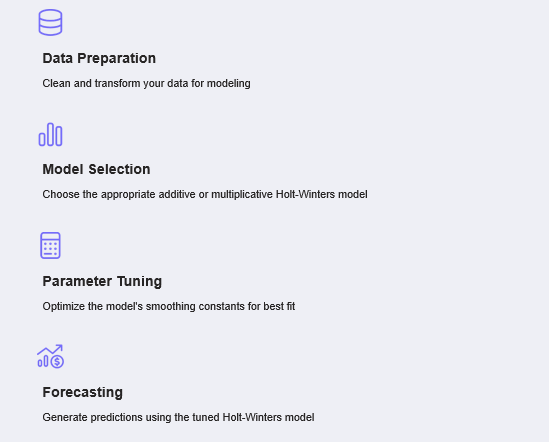

In [ ]:
df.isnull().sum()

date     0
sales    0
dtype: int64

## Data Structure required for Time series

In [ ]:
df=df.groupby('date').sum()

In [ ]:
df.head(10)
# daily sales data

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0
2018-01-06,385.0
2018-01-07,492.0
2018-01-08,473.0
2018-01-09,249.0


In [ ]:
#daily> monthyly
# how to aggregate the date we take the sum or the mean?
df=df.resample(rule='MS').sum() # rule & aggregation parameter

#description
#A: year End
#MS: Month Start
#M: Month ensure_dir_exists
#W: Weekly
#D: Daily

In [ ]:
df.head(10)
#monthly sales

,sales
date,
2018-01-01,9035.0
2018-02-01,9571.0
2018-03-01,13143.0
2018-04-01,12427.0
2018-05-01,8133.0
2018-06-01,7437.0
2018-07-01,11758.0
2018-08-01,9992.0
2018-09-01,7216.0


In [ ]:
df.tail(10)

,sales
date,
2019-03-01,8188.55
2019-04-01,7894.25
2019-05-01,5397.40
2019-06-01,5012.80
2019-07-01,7837.30
2019-08-01,6207.00
2019-09-01,4379.25
2019-10-01,4043.45
2019-11-01,6406.95


<Axes: xlabel='date'>

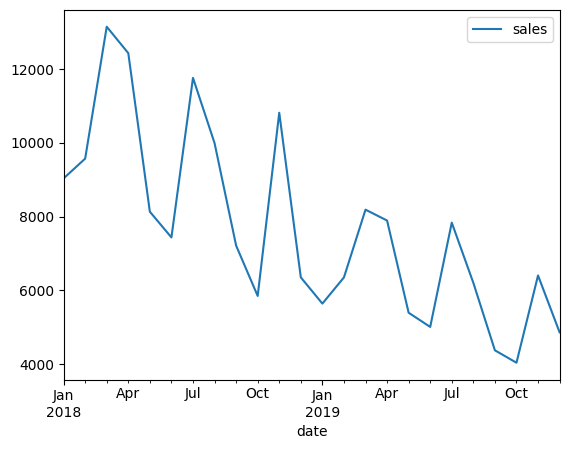

In [ ]:
df.plot()
# the trend is decreasing overtime. It also shows seasonality in it.
# the graph shows both trend and seasonality.

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
#seasonal_decompose decomposes the sales data into trend, seasonal, and residual components.

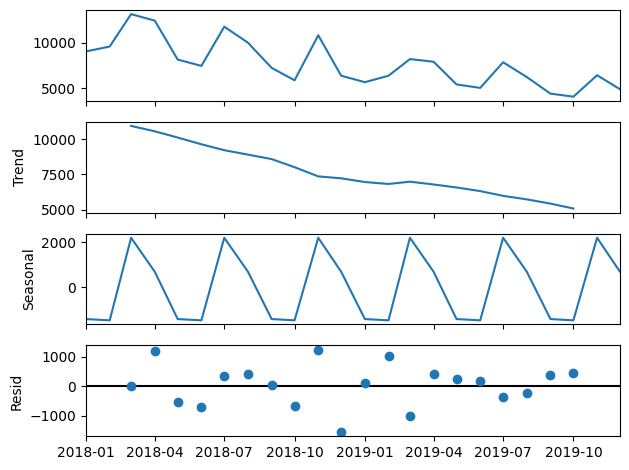

In [ ]:
seasonal_decompose(df, model='additive',period=4).plot(); #quarterly seasonality

This shows a linear trend and a strong quarterly seasonality

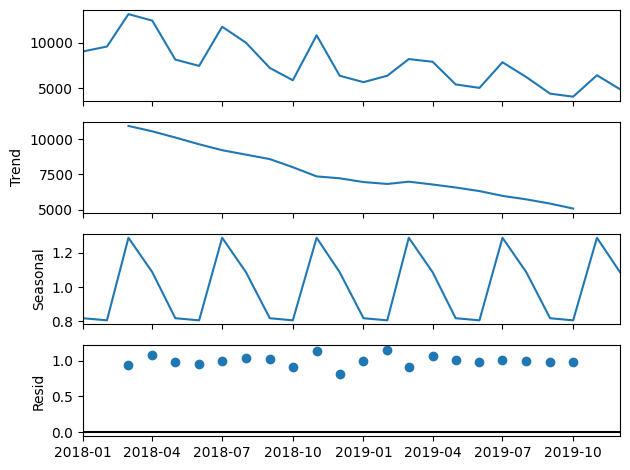

In [ ]:
seasonal_decompose(df, model='multiplicative',period=4).plot();

The trend is additive in nature from the visuals (linear) and the seasonality is multiplicative in nature.

## Train test Split

In [ ]:
train=df[:19] #till Jul19
test=df[19:] # from aug19

In [ ]:
train.tail()

,sales
date,
2019-03-01,8188.55
2019-04-01,7894.25
2019-05-01,5397.40
2019-06-01,5012.80
2019-07-01,7837.30


In [ ]:
test

,sales
date,
2019-08-01,6207.00
2019-09-01,4379.25
2019-10-01,4043.45
2019-11-01,6406.95
2019-12-01,4867.25


##Holt Winters Model

In [ ]:
#import the ncessary library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
#initiate the model holt winter model and build it on the train data
hwmodel=ExponentialSmoothing(train.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

In [ ]:
test_pred=hwmodel.forecast(5) # let's use our model to predict the next 5 months (test dataset)

In [ ]:
test_pred

2019-08-01    6002.745942
2019-09-01    4162.911344
2019-10-01    3961.802154
2019-11-01    5945.097529
2019-12-01    4877.939702
Freq: MS, dtype: float64

<Axes: xlabel='date'>

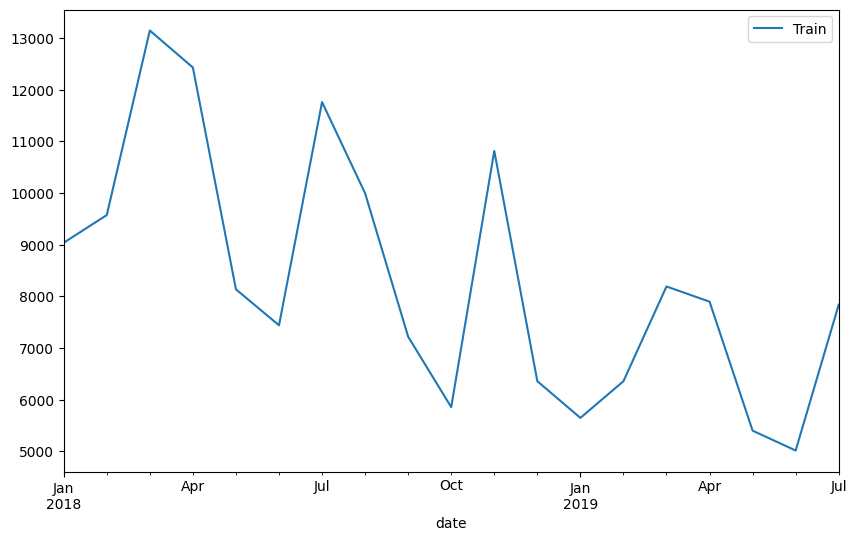

In [ ]:
# Let's plot the actual values of the train data
train['sales'].plot(legend=True, label='Train', figsize=(10,6))

<Axes: xlabel='date'>

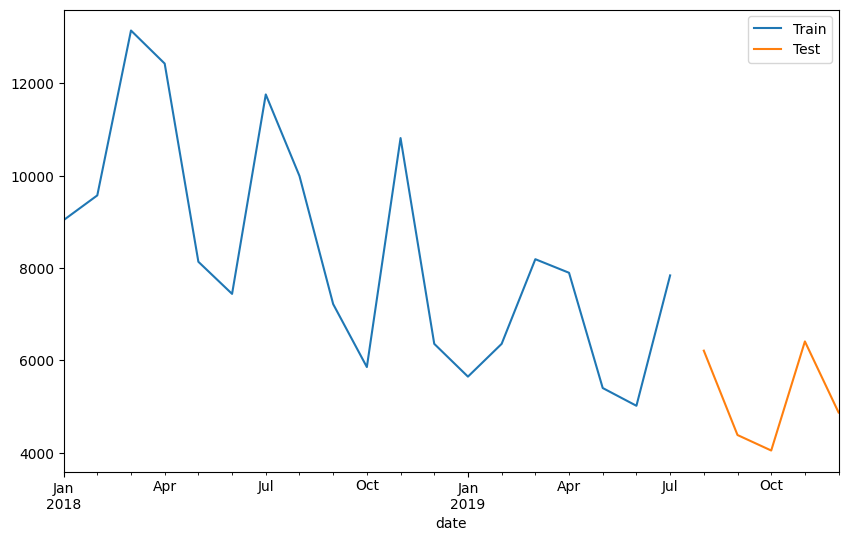

In [ ]:
train['sales'].plot(legend=True, label='Train', figsize=(10,6))
test['sales'].plot(legend=True, label='Test') # Let's have a look at the actual values of of the test data

<Axes: xlabel='date'>

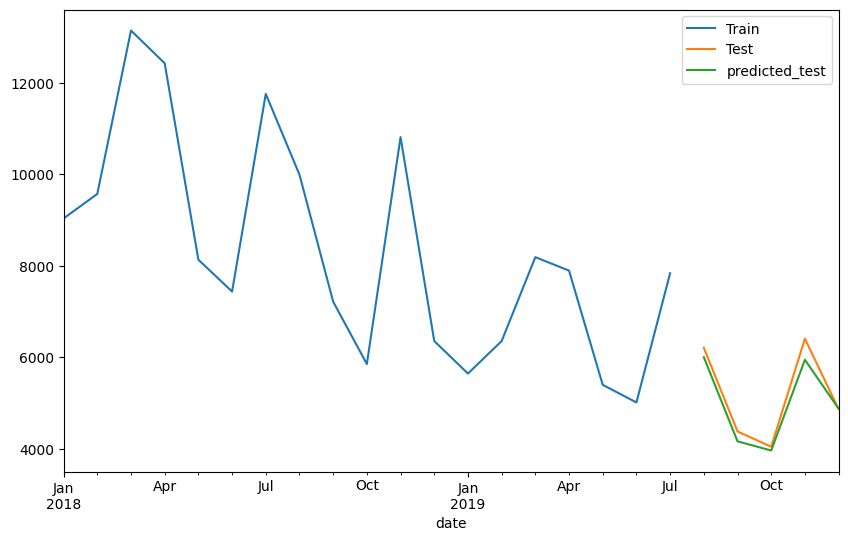

In [ ]:
train['sales'].plot(legend=True, label='Train', figsize=(10,6))
test['sales'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test') # our prediction

The prediction is actually good. It is capturing the trend and seasonality well from the visuals.

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error # MSE is a good evaluation merix for time series

In [ ]:
# let's evaluate the actual test values and the predicted values
mean_squared_error(test,test_pred)

61722.096027278065

In [ ]:
# let's evaluate the actual test values and the predicted values
np.sqrt(mean_squared_error(test,test_pred))

248.43932061426602

In [ ]:
df.sales.mean(), np.sqrt(df.sales.var())

(7665.204166666666, 2549.757117414906)

##Final Model

In [ ]:
# let,s build our model on the entire sales data
final_model=ExponentialSmoothing(df.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

In [ ]:
# let's do the prediction for the next 5 months
pred=final_model.forecast(5)

In [ ]:
pred

2020-01-01    3532.741778
2020-02-01    3330.571032
2020-03-01    4975.904975
2020-04-01    4032.122902
2020-05-01    2746.791129
Freq: MS, dtype: float64

<Axes: xlabel='date'>

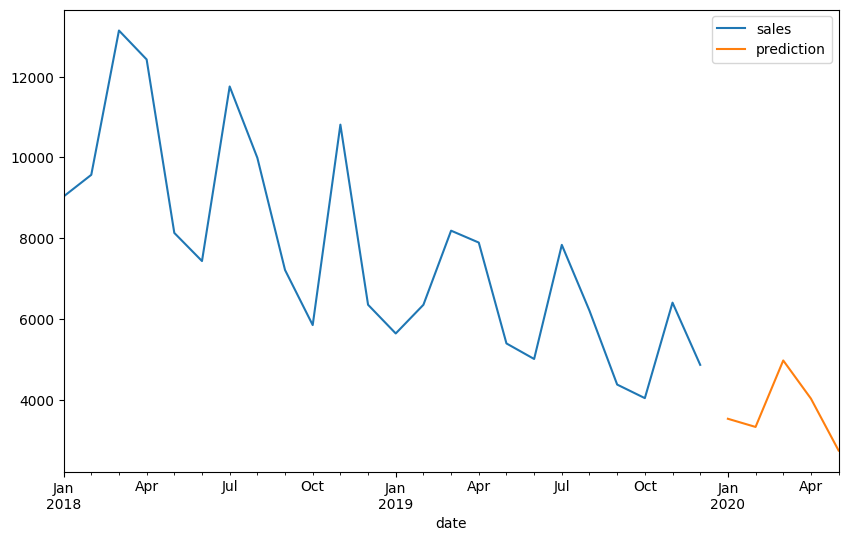

In [ ]:
df['sales'].plot(legend=True, label='sales', figsize=(10,6))
pred.plot(legend=True, label='prediction')

#Questions?

#Thank you